In [23]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [24]:
# data
path_X = 'nuclear_x.csv'
path_y = 'nuclear_y.csv'
path=[path_X,path_y]

for i in range(2):
    with open(path[i], encoding='utf-8') as f:
        if i ==0:
            X = np.loadtxt(path[i],delimiter=',') #20000,2
        else:
            y = np.loadtxt(path[i], delimiter=',').reshape(-1,1)

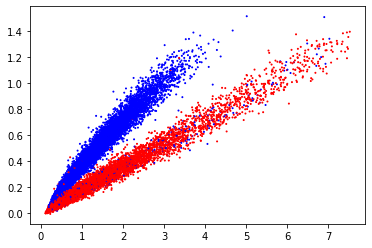

In [25]:
# visualization
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=['red' if label == -1 else 'blue' for label in y],s=1)

### 3&4

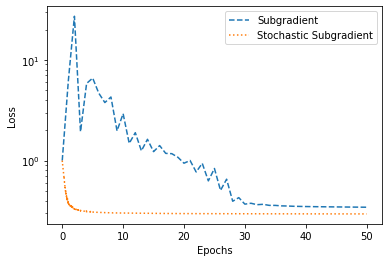

In [26]:
def subgrad(X_aug,y,theta,lam=0.001):
    n1 = len(X_aug)
    n = 20000
    w = np.concatenate((np.zeros((1,1)),theta[1:,:].T),axis=1).T # 3,1 [b;w1;w2]
    mask = y*np.dot(X_aug,theta) <= 1 #20000,1
    grad = -((mask*y*X_aug).sum(0)).reshape(-1,1) + n1*lam*w#20000,3
    return grad/n

def subgrad_descent(X,y,batch_size,epochs):
    np.random.seed(42)
    X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
    
    theta = np.zeros((X.shape[1],1))
    a = theta.copy()
    thetas=[a]

    for j in range(1,epochs+1):
        step_size = 100/j
        indices = list(np.arange(X.shape[0]))
        np.random.shuffle(indices)

        for k in range(0,len(X),batch_size):
            batch_indices = indices[k:k+batch_size] # 0-1 1-2 2-3
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            grad = subgrad(X_batch,y_batch,a)
            a = a - step_size*grad
            thetas.append(a)
    return thetas

def loss(X,y,thetas,lam=0.001):
    ls = []
    thetas = np.array(thetas)
    for w,b in zip(thetas[:,1:,:],thetas[:,0,:]):
        t = X@w+b
        L = np.maximum(0,1-y*t)
        ls.append(L.mean()+(lam/2)*np.linalg.norm(w)**2)
    return ls

fig,ax = plt.subplots()
# subgradient
thetas = subgrad_descent(X,y,batch_size=20000,epochs=50)
Js = loss(X,y,thetas)
ax.plot(np.arange(len(Js)), Js, '--', label='Subgradient')

thetas_sto = subgrad_descent(X,y,batch_size=1,epochs=50)
Js_sto = loss(X,y,thetas_sto[::100])
ax.plot(np.arange(len(Js_sto)) / X.shape[0]*100, Js_sto, ':', label='Stochastic Subgradient')

plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [27]:
print(f'Subgradient Method:\nw0={thetas[-1][1]}, w1={thetas[-1][2]}, b={thetas[-1][0]}, J={Js[-1]}\n')
print(f'Stochastic Subgradient Method:\nw0={thetas_sto[-1][1]}, w1={thetas_sto[-1][2]}, b={thetas_sto[-1][0]}, J={Js_sto[-1]}')

Subgradient Method:
w0=[-3.67021664], w1=[18.12076997], b=[-1.04167911], J=0.3441124087943893

Stochastic Subgradient Method:
w0=[-2.22976727], w1=[11.38929958], b=[-0.94546602], J=0.295309709368565


In [28]:
def plot_decesion_boundary(x_min,x_max,w,b,linestyle,label,color):
    plt.plot([x_min,x_max],[(-b-x_min*w[0])/w[1],(-b-x_max*w[0])/w[1]],linestyle,label=label,c=color)

### Plot decision boundary of two methods

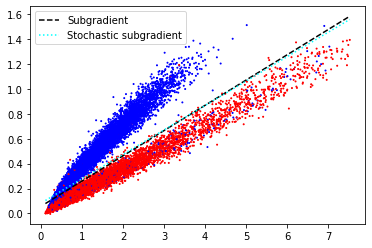

In [29]:
x_min=X[:,0].min()
x_max=X[:,0].max()
plt.scatter(X[:,0],X[:,1],c=['red' if label == -1 else 'blue' for label in y],s=1)

plot_decesion_boundary(x_min,x_max,thetas[-1][1:],thetas[-1][0],'--','Subgradient',color='black')
plot_decesion_boundary(x_min,x_max,thetas_sto[-1][1:],thetas_sto[-1][0],':','Stochastic subgradient',color='cyan')
plt.legend()


### 5. Comment on the (emperical) rate of convergence of the stochastic subgradient method relative to the subgradient mehtod.

The convergence rate of Stochasitic subgradient method is much more faster than subgradient method, as shown in the fig above. Because stochastic method consider only one example at each update.